In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

In [4]:
def oracle():
    qc = QuantumCircuit(3)
    
    # Flip |101> and |110> using phase flip
    qc.cz(0, 2)  # Phase flip on |101>
    qc.cz(1, 2)  # Phase flip on |110>
    
    return qc

In [5]:
def diffusion_operator():
    qc = QuantumCircuit(3)
    
    qc.h(range(3))      # Apply Hadamard to all qubits
    qc.x(range(3))      # Apply X gates to all qubits
    qc.h(2)             # Hadamard on last qubit
    qc.ccx(0, 1, 2)     # Multi-control NOT (Toffoli)
    qc.h(2)             # Hadamard on last qubit
    qc.x(range(3))      # Apply X gates again
    qc.h(range(3))      # Apply Hadamard again
    
    return qc

In [ ]:
grover_circuit = QuantumCircuit(3, 3)   

In [7]:
grover_circuit.h(range(3))

In [8]:
grover_circuit.compose(oracle(), inplace=True)

In [9]:
grover_circuit.compose(diffusion_operator(), inplace=True)

In [10]:
grover_circuit.measure(range(3), range(3))

In [13]:
from qiskit import transpile
from qiskit_aer import AerSimulator

# Backend
simulator = AerSimulator()

# Transpile your circuit
compiled_circuit = transpile(grover_circuit, simulator)

# Run directly (no assemble needed)
result = simulator.run(compiled_circuit, shots=1024).result()

counts = result.get_counts()
print(counts)


{'101': 517, '110': 507}


Measurement results: {'101': 517, '110': 507}


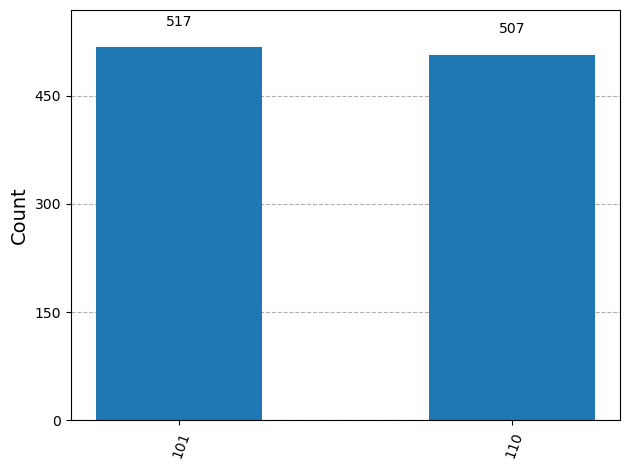

In [15]:
print("Measurement results:", counts)
plot_histogram(counts)